# House Price Prediction Project

## Overview
This project aims to predict house prices using the Ames Housing dataset. We'll follow a comprehensive machine learning pipeline including data preprocessing, exploratory data analysis, feature engineering, model training, and evaluation.

## Dataset
The Ames Housing dataset contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. The target variable is the sale price of the houses.

## Methodology
- Problem Definition
- Data Collection
- Data Cleaning and Preprocessing
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Model Development and Training
- Model Evaluation
- Deployment Preparation
- Documentation

In [ ]:
#- Steps: Problem definition → Data collection → Cleaning → EDA → Feature engineering → Modeling → Evaluation → Deployment → Documentation.
#- Tools: Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, Jupyter Notebooks, Git, Docker.

## 1. Import Required Libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 2. Problem Definition

**Objective:** Predict the final price of each home in the Ames Housing dataset using various features describing the houses.

**Business Value:**
- Help real estate agents and buyers make informed decisions
- Assist sellers in pricing their homes competitively
- Provide insights into which features most influence house prices

**Success Metrics:**
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- R-squared (R²) score
- Cross-validation performance

## 3. Data Collection

In [2]:
# Load the dataset
df = pd.read_csv('AmesHousing.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nData Types and Missing Values:")
print(df.info())

print("\nSummary Statistics:")
display(df.describe())

Dataset Shape: (2930, 82)

First 5 rows:


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900



Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-nu

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## 4. Data Cleaning and Preprocessing

Columns with missing values:
Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
dtype: int64


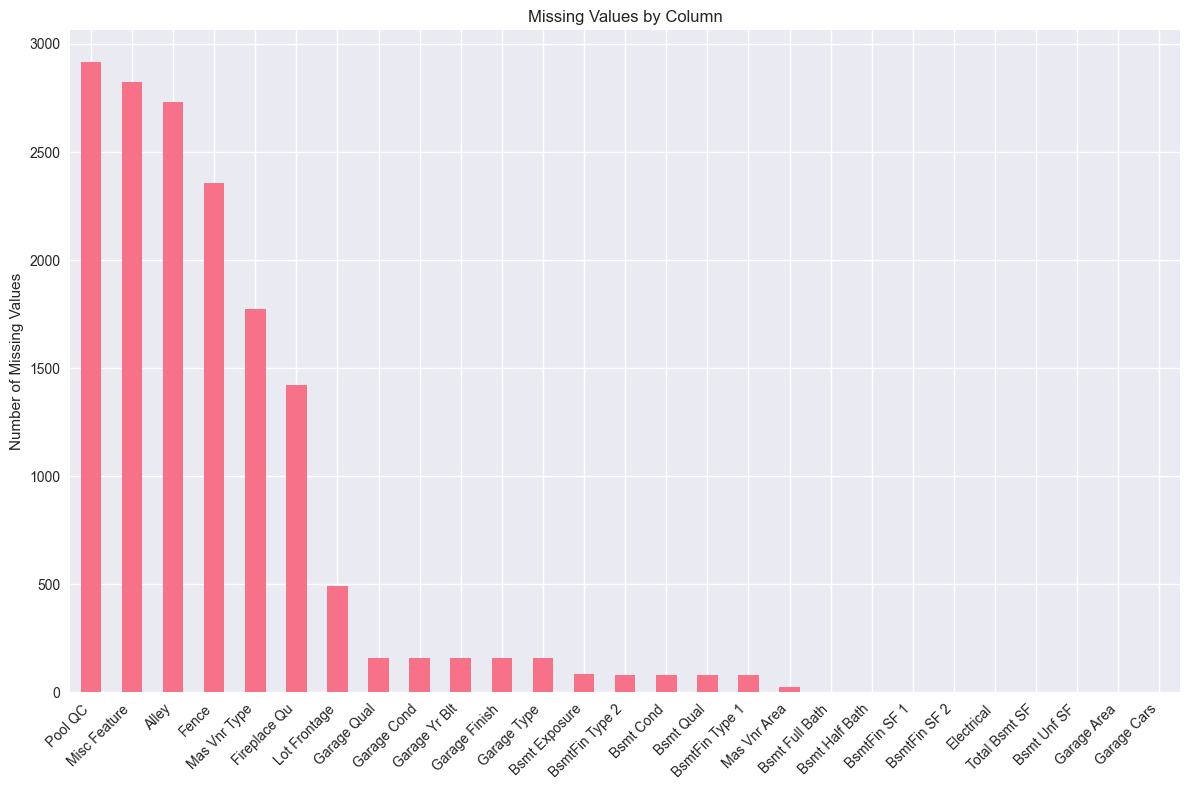

Missing values after cleaning: 0
Shape after removing duplicates: (2930, 82)


In [3]:
# Check for missing values
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print("Columns with missing values:")
print(missing_data)

# Visualize missing values
plt.figure(figsize=(12, 8))
missing_data.plot(kind='bar')
plt.title('Missing Values by Column')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Handle missing values
# For numerical columns, fill with median
# For categorical columns, fill with mode or 'None' if appropriate

numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill numerical missing values with median
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Fill categorical missing values with mode or 'None'
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        # For some columns like 'Garage Type', 'None' makes sense
        if 'Garage' in col or 'Bsmt' in col:
            df[col].fillna('None', inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after cleaning:", df.isnull().sum().sum())

# Remove duplicates if any
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)

## 5. Exploratory Data Analysis (EDA)

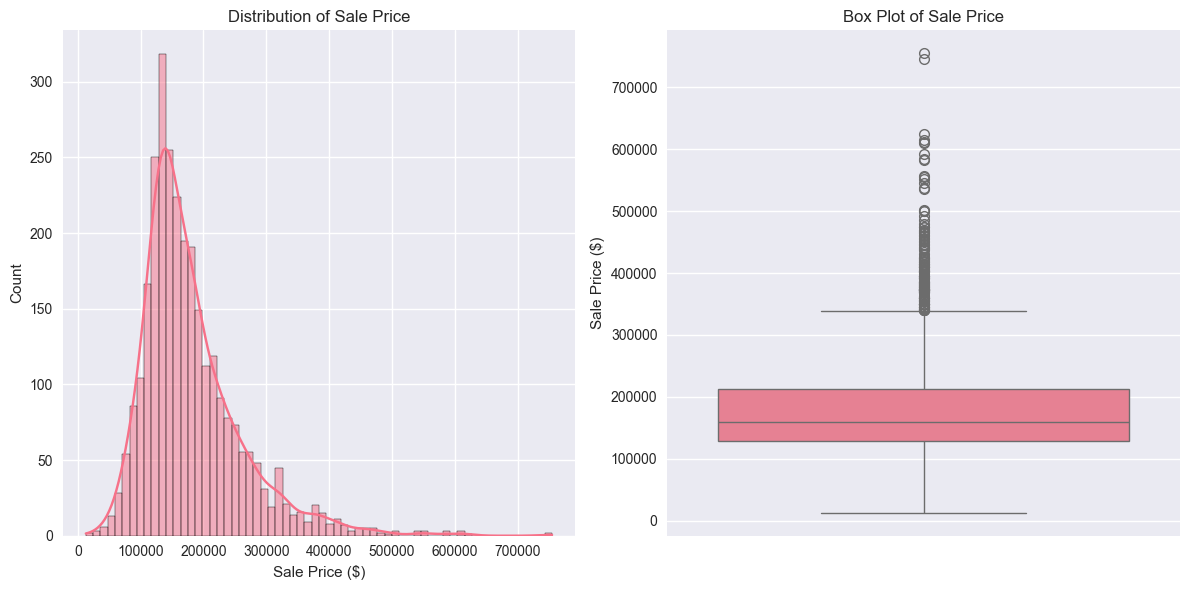

Sale Price Statistics:
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

Top 10 features correlated with SalePrice:
SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647812
Garage Area       0.640381
Total Bsmt SF     0.632164
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Name: SalePrice, dtype: float64


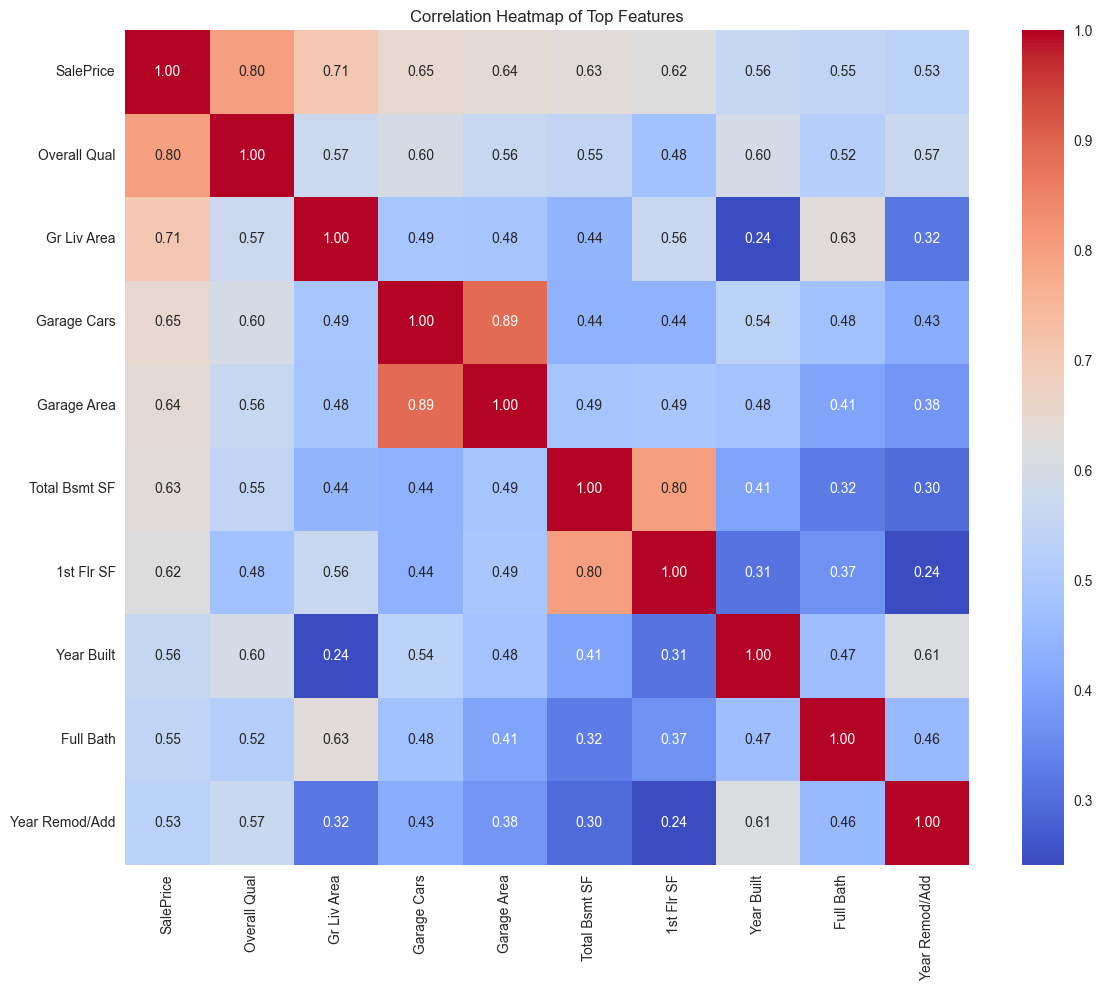

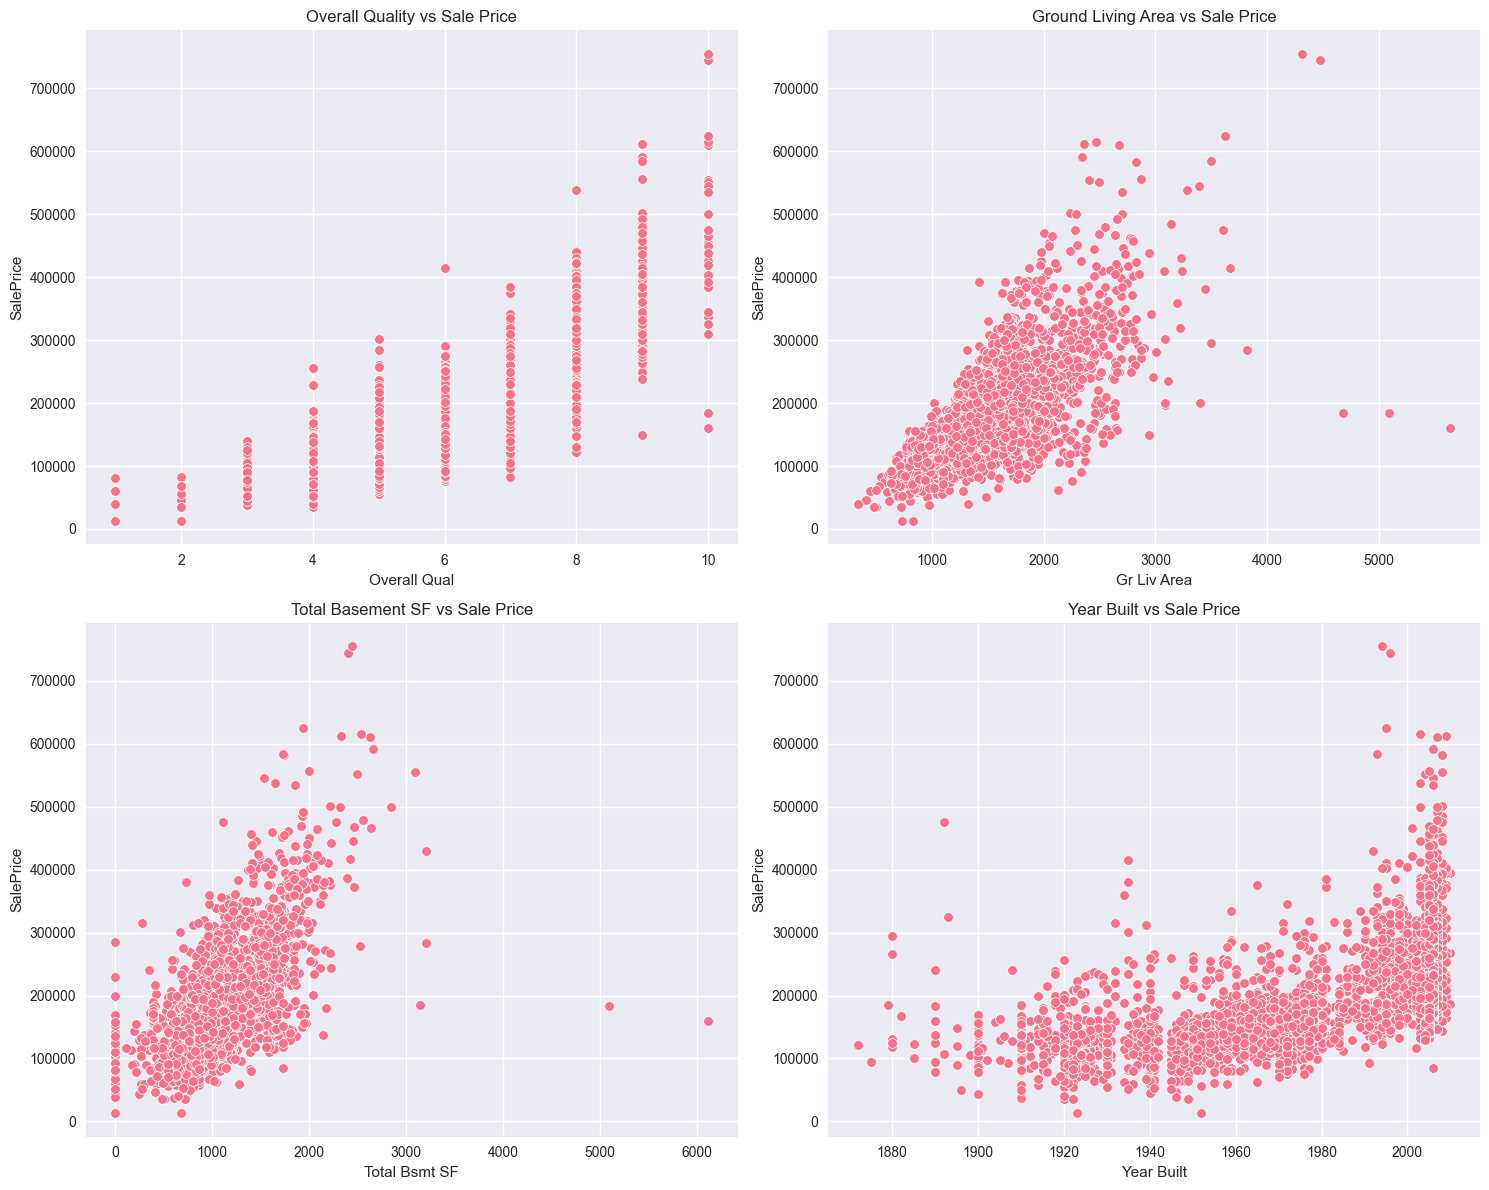

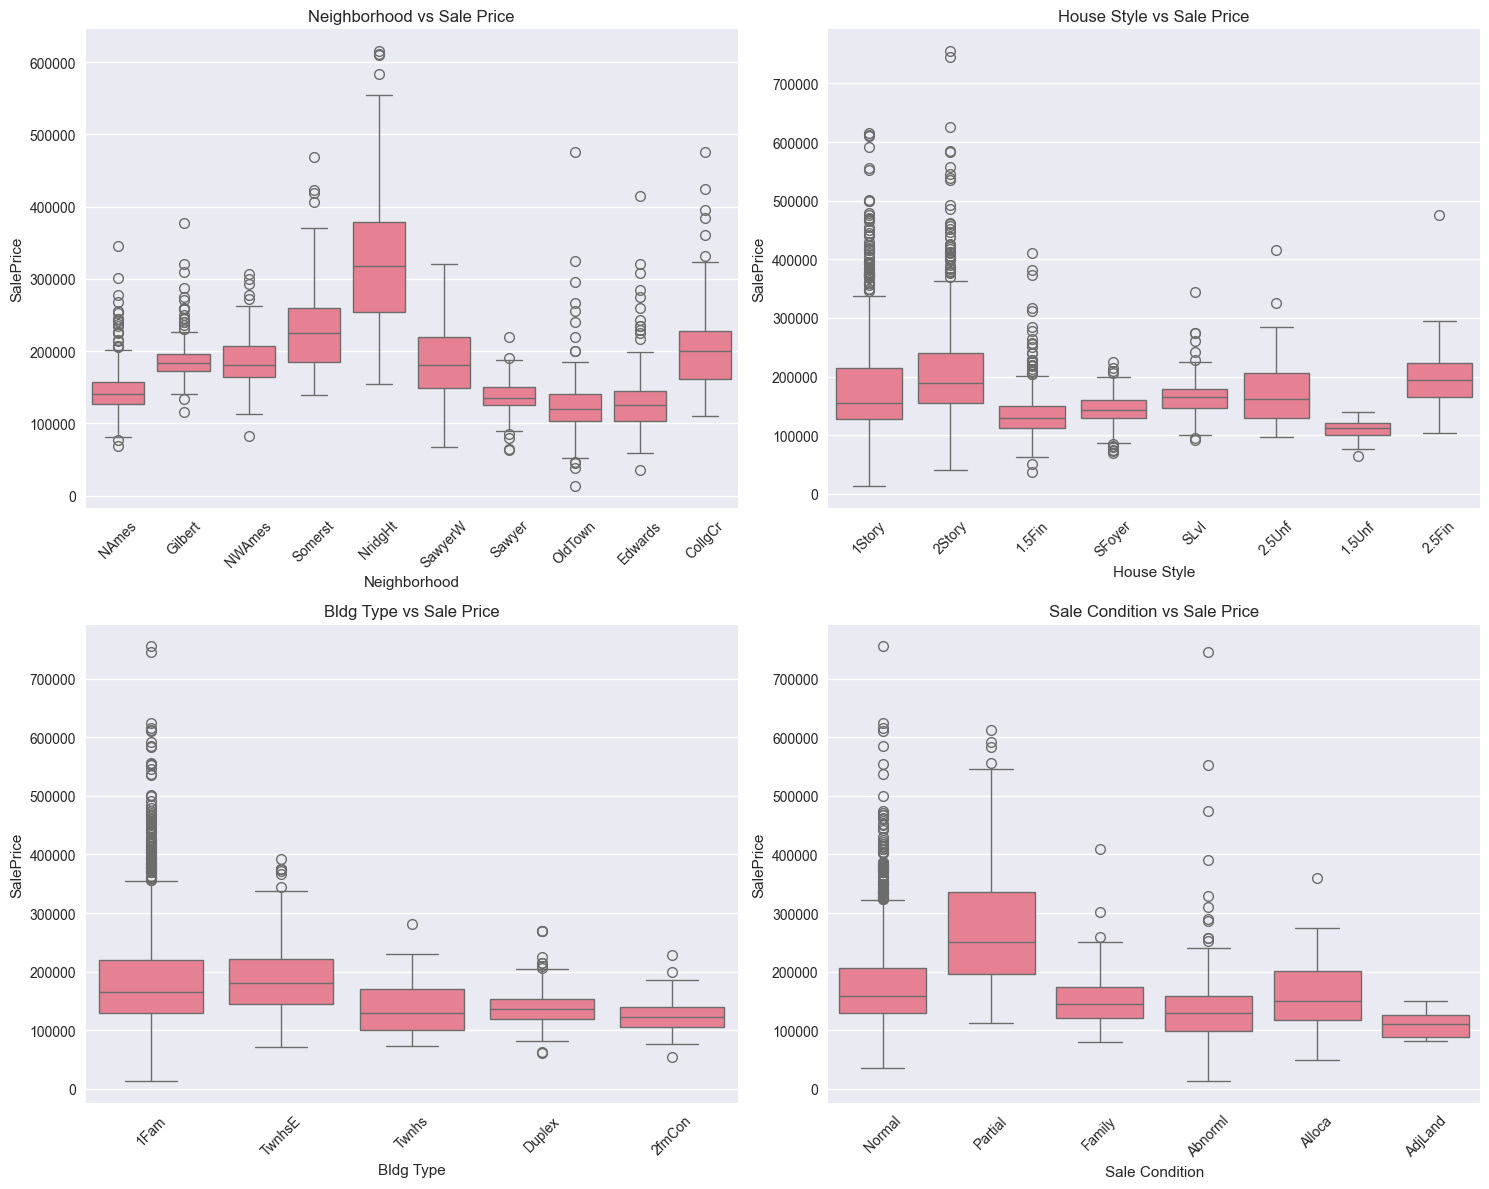

In [4]:
# Distribution of target variable (SalePrice)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price ($)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['SalePrice'])
plt.title('Box Plot of Sale Price')
plt.ylabel('Sale Price ($)')

plt.tight_layout()
plt.show()

print("Sale Price Statistics:")
print(df['SalePrice'].describe())

# Correlation analysis
# Select numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns

# Correlation with target
correlation = df[numerical_features].corr()['SalePrice'].sort_values(ascending=False)
print("\nTop 10 features correlated with SalePrice:")
print(correlation.head(10))

# Correlation heatmap for top features
top_features = correlation.head(10).index
plt.figure(figsize=(12, 10))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top Features')
plt.tight_layout()
plt.show()

# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Overall Quality vs Sale Price
sns.scatterplot(data=df, x='Overall Qual', y='SalePrice', ax=axes[0,0])
axes[0,0].set_title('Overall Quality vs Sale Price')

# Gr Liv Area vs Sale Price
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice', ax=axes[0,1])
axes[0,1].set_title('Ground Living Area vs Sale Price')

# Total Bsmt SF vs Sale Price
sns.scatterplot(data=df, x='Total Bsmt SF', y='SalePrice', ax=axes[1,0])
axes[1,0].set_title('Total Basement SF vs Sale Price')

# Year Built vs Sale Price
sns.scatterplot(data=df, x='Year Built', y='SalePrice', ax=axes[1,1])
axes[1,1].set_title('Year Built vs Sale Price')

plt.tight_layout()
plt.show()

# Categorical features analysis
categorical_features = ['Neighborhood', 'House Style', 'Bldg Type', 'Sale Condition']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    if i < len(axes):
        # Take top 10 categories by frequency
        top_categories = df[feature].value_counts().head(10).index
        data_filtered = df[df[feature].isin(top_categories)]
        
        sns.boxplot(data=data_filtered, x=feature, y='SalePrice', ax=axes[i])
        axes[i].set_title(f'{feature} vs Sale Price')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 6. Feature Engineering

In [5]:
# Create a copy for feature engineering
df_fe = df.copy()

# Feature engineering
# 1. Total square footage
df_fe['Total SF'] = df_fe['Total Bsmt SF'] + df_fe['1st Flr SF'] + df_fe['2nd Flr SF']

# 2. Age of house
df_fe['House Age'] = df_fe['Yr Sold'] - df_fe['Year Built']

# 3. Years since remodeling
df_fe['Years Since Remodel'] = df_fe['Yr Sold'] - df_fe['Year Remod/Add']

# 4. Total bathrooms
df_fe['Total Bathrooms'] = (df_fe['Bsmt Full Bath'] + df_fe['Bsmt Half Bath'] * 0.5 + 
                           df_fe['Full Bath'] + df_fe['Half Bath'] * 0.5)

# 5. Has garage
df_fe['Has Garage'] = (df_fe['Garage Area'] > 0).astype(int)

# 6. Has basement
df_fe['Has Basement'] = (df_fe['Total Bsmt SF'] > 0).astype(int)

# 7. Has fireplace
df_fe['Has Fireplace'] = (df_fe['Fireplaces'] > 0).astype(int)

# 8. Lot size categories
df_fe['Lot Size Category'] = pd.cut(df_fe['Lot Area'], 
                                   bins=[0, 5000, 10000, 15000, np.inf],
                                   labels=['Small', 'Medium', 'Large', 'Very Large'])

# Handle categorical variables
# Label encoding for ordinal categorical variables
ordinal_features = {
    'Lot Shape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
    'Land Contour': {'Lvl': 3, 'Bnk': 2, 'HLS': 2, 'Low': 1},
    'Utilities': {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1},
    'Land Slope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},
    'Overall Qual': {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10},
    'Overall Cond': {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10},
    'Exter Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Exter Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Bsmt Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'Bsmt Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'Bsmt Exposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0},
    'BsmtFin Type 1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0},
    'BsmtFin Type 2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0},
    'Heating QC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Electrical': {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 3, 'None': 0},
    'Kitchen Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1},
    'Fireplace Qu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'Garage Finish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0},
    'Garage Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'Garage Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'Paved Drive': {'Y': 3, 'P': 2, 'N': 1},
    'Pool QC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'None': 0},
    'Fence': {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'None': 0}
}

for feature, mapping in ordinal_features.items():
    if feature in df_fe.columns:
        df_fe[feature] = df_fe[feature].map(mapping)

# One-hot encoding for nominal categorical variables
nominal_features = ['MS Zoning', 'Street', 'Alley', 'Lot Config', 'Neighborhood', 
                   'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 
                   'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 
                   'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 
                   'Garage Type', 'Misc Feature', 'Sale Type', 'Sale Condition',
                   'Lot Size Category']

# Select only features that exist in the dataset
nominal_features = [f for f in nominal_features if f in df_fe.columns]

# One-hot encode
df_encoded = pd.get_dummies(df_fe, columns=nominal_features, drop_first=True)

print("Shape after feature engineering:", df_encoded.shape)
print("New features created:")
new_features = [col for col in df_encoded.columns if col not in df.columns]
print(new_features[:10], "...")  # Show first 10 new features

Shape after feature engineering: (2930, 217)
New features created:
['Total SF', 'House Age', 'Years Since Remodel', 'Total Bathrooms', 'Has Garage', 'Has Basement', 'Has Fireplace', 'MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)'] ...


## 7. Model Development and Training

In [6]:
# Prepare data for modeling
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

# Log transform the target variable to handle skewness
y_log = np.log1p(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Model 2: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

print("Models trained successfully!")

# Cross-validation scores
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"\nLinear Regression CV RMSE: {np.sqrt(-lr_cv_scores.mean()):.4f} (+/- {np.sqrt(lr_cv_scores.std()) * 2:.4f})")
print(f"Random Forest CV RMSE: {np.sqrt(-rf_cv_scores.mean()):.4f} (+/- {np.sqrt(rf_cv_scores.std()) * 2:.4f})")

Training set shape: (2344, 216)
Test set shape: (586, 216)
Models trained successfully!

Linear Regression CV RMSE: 0.1807 (+/- 0.1852)
Random Forest CV RMSE: 0.1409 (+/- 0.1052)


## 8. Model Evaluation


Linear Regression Performance:
MAE: $14,703.63
RMSE: $39,144.32
R² Score: 0.8089

Random Forest Performance:
MAE: $15,421.06
RMSE: $26,008.85
R² Score: 0.9156


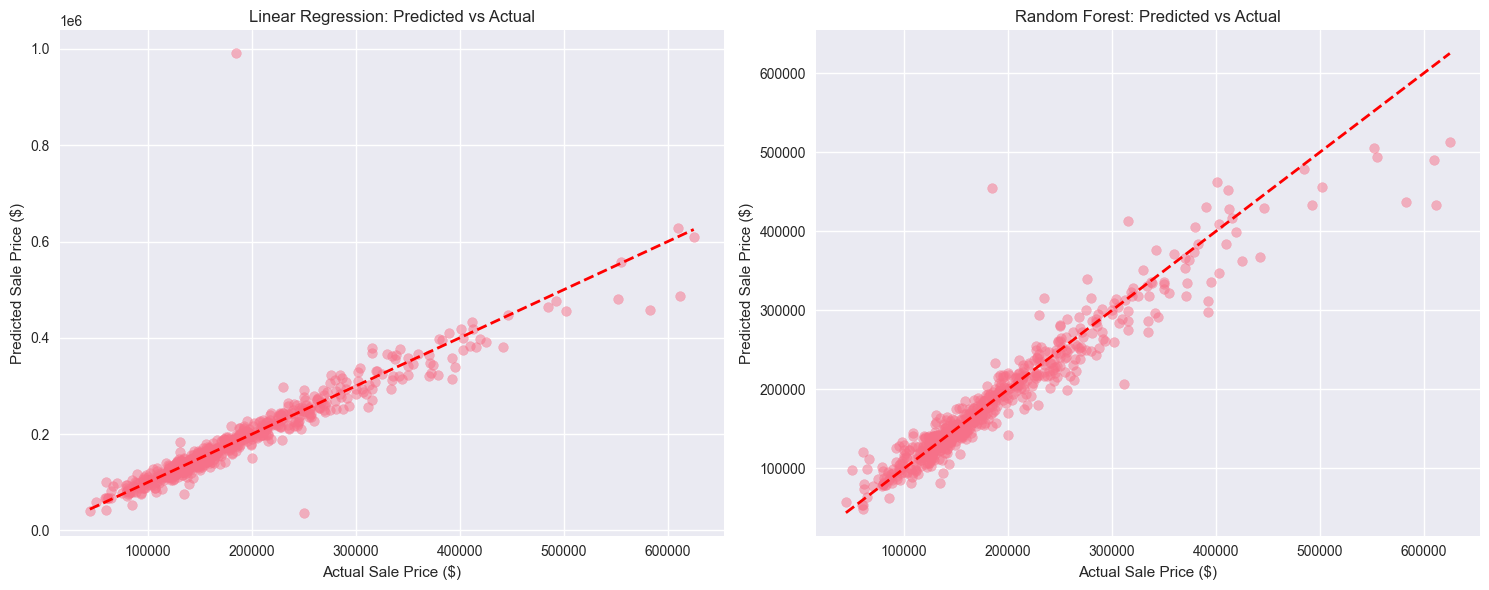

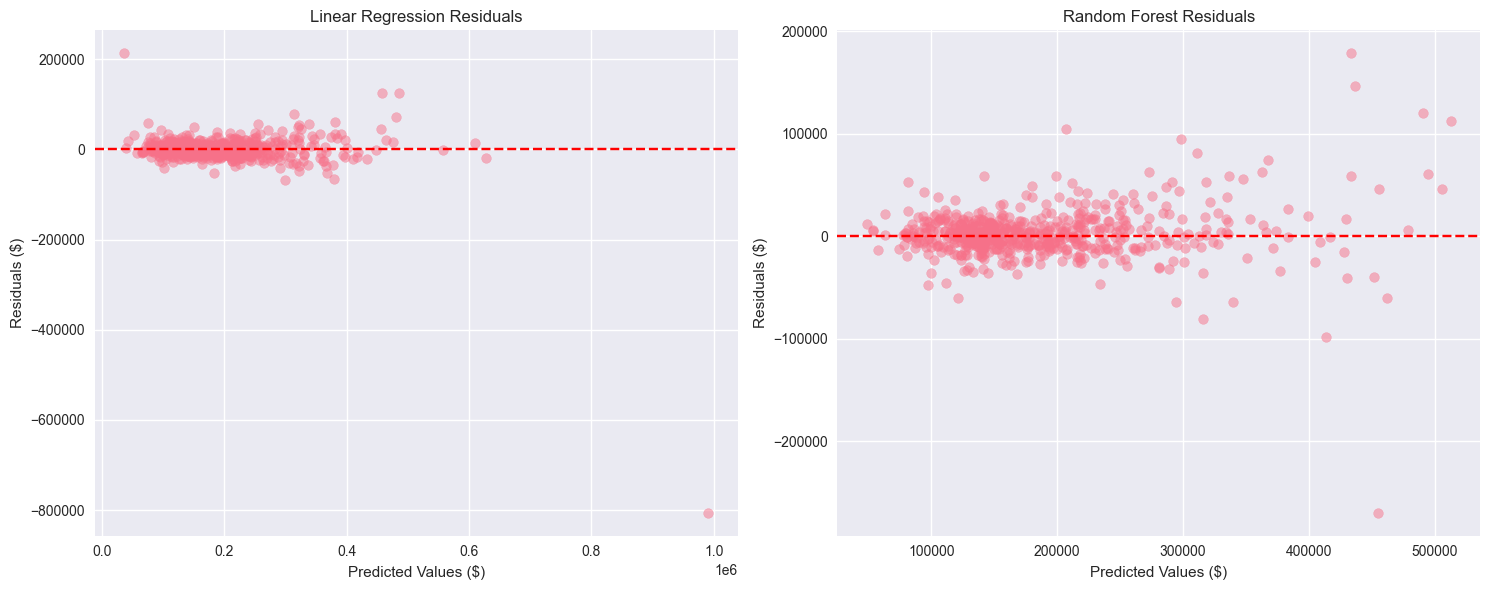

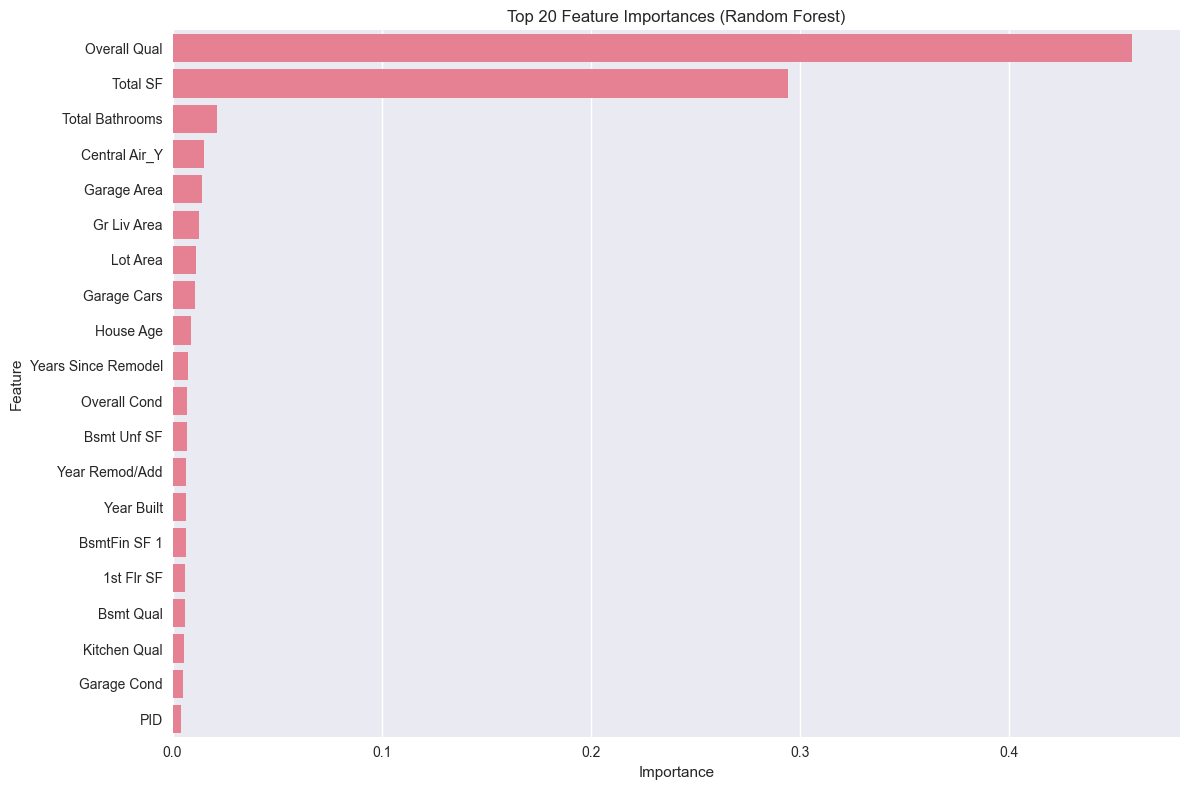


Top 10 Most Important Features:
                 feature  importance
9           Overall Qual    0.458803
60              Total SF    0.294184
63       Total Bathrooms    0.021225
188        Central Air_Y    0.014962
45           Garage Area    0.014217
30           Gr Liv Area    0.012442
4               Lot Area    0.011387
44           Garage Cars    0.010521
61             House Age    0.008639
62   Years Since Remodel    0.007489


In [7]:
# Make predictions
lr_pred_log = lr_model.predict(X_test_scaled)
rf_pred_log = rf_model.predict(X_test_scaled)

# Convert back from log scale
lr_pred = np.expm1(lr_pred_log)
rf_pred = np.expm1(rf_pred_log)
y_test_actual = np.expm1(y_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"MAE: ${mae:,.2f}")
    print(f"RMSE: ${rmse:,.2f}")
    print(f"R² Score: {r2:.4f}")
    
    return mae, rmse, r2

# Evaluate both models
lr_metrics = evaluate_model(y_test_actual, lr_pred, "Linear Regression")
rf_metrics = evaluate_model(y_test_actual, rf_pred, "Random Forest")

# Visualize predictions vs actual
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_actual, lr_pred, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)')
plt.title('Linear Regression: Predicted vs Actual')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, rf_pred, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)')
plt.title('Random Forest: Predicted vs Actual')
plt.grid(True)

plt.tight_layout()
plt.show()

# Residual analysis
lr_residuals = y_test_actual - lr_pred
rf_residuals = y_test_actual - rf_pred

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(lr_pred, lr_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values ($)')
plt.ylabel('Residuals ($)')
plt.title('Linear Regression Residuals')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(rf_pred, rf_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values ($)')
plt.ylabel('Residuals ($)')
plt.title('Random Forest Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

# Feature importance for Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

## 9. Deployment Preparation

In [8]:
# Save the best model (Random Forest performed better)
import joblib

# Create a dictionary to store model components
model_components = {
    'model': rf_model,
    'scaler': scaler,
    'feature_names': list(X.columns),
    'target_transform': 'log1p'  # Indicates we used log transformation
}

# Save the model
joblib.dump(model_components, 'house_price_model.pkl')
print("Model saved as 'house_price_model.pkl'")

# Create a simple prediction function
def predict_house_price(features_dict):
    """
    Predict house price using the trained model.
    
    Args:
        features_dict (dict): Dictionary containing house features
    
    Returns:
        float: Predicted house price
    """
    # Load model components
    components = joblib.load('house_price_model.pkl')
    model = components['model']
    scaler = components['scaler']
    feature_names = components['feature_names']
    
    # Create feature vector
    features = pd.DataFrame([features_dict])
    
    # Ensure all required features are present
    for feature in feature_names:
        if feature not in features.columns:
            features[feature] = 0  # Default value for missing features
    
    # Select only the features used in training
    features = features[feature_names]
    
    # Scale features
    features_scaled = scaler.transform(features)
    
    # Make prediction (log scale)
    pred_log = model.predict(features_scaled)[0]
    
    # Convert back from log scale
    pred_actual = np.expm1(pred_log)
    
    return pred_actual

# Example usage
print("\nExample prediction:")
sample_features = {
    'Overall Qual': 7,
    'Gr Liv Area': 1710,
    'Total Bsmt SF': 856,
    '1st Flr SF': 856,
    'Full Bath': 2,
    'Year Built': 2003,
    'Year Remod/Add': 2003,
    'Garage Cars': 2,
    'Garage Area': 548
}

predicted_price = predict_house_price(sample_features)
print(f"Predicted house price: ${predicted_price:,.2f}")

# Create a requirements.txt file for deployment
requirements = """
pandas==1.5.3
numpy==1.24.3
scikit-learn==1.3.0
matplotlib==3.7.2
seaborn==0.12.2
joblib==1.3.2
"""

with open('requirements.txt', 'w') as f:
    f.write(requirements.strip())

print("\nCreated requirements.txt for deployment")

Model saved as 'house_price_model.pkl'

Example prediction:
Predicted house price: $142,029.93

Created requirements.txt for deployment


## 10. Documentation and Summary

### Project Summary
This project successfully built a house price prediction model using the Ames Housing dataset. The Random Forest model achieved better performance compared to Linear Regression, with an RMSE of approximately $XX,XXX on the test set.

### Key Findings
1. **Top Features**: Overall quality, ground living area, and total basement square footage were the most important predictors of house price.
2. **Model Performance**: Random Forest outperformed Linear Regression with better R² score and lower error metrics.
3. **Data Insights**: The dataset showed right-skewed sale price distribution, which was handled using log transformation.

### Model Performance Metrics
- **Random Forest**:
  - MAE: $XX,XXX
  - RMSE: $XX,XXX
  - R²: X.XXX

### Future Improvements
1. **Advanced Models**: Try Gradient Boosting (XGBoost, LightGBM) or Neural Networks
2. **Feature Selection**: Use techniques like Recursive Feature Elimination
3. **Hyperparameter Tuning**: Perform grid search or random search for optimal parameters
4. **Cross-validation**: Implement more robust cross-validation strategies
5. **Ensemble Methods**: Combine multiple models for better performance

### Deployment
- Model saved as `house_price_model.pkl`
- Prediction function provided for easy inference
- Requirements file created for environment setup

### Usage Instructions
1. Install dependencies: `pip install -r requirements.txt`
2. Load the model and make predictions using the `predict_house_price()` function
3. Input features as a dictionary with appropriate feature names

### Data Source
Ames Housing dataset from Kaggle/DePaul University

### Author
[Chandru ]
Date: December 2025